# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   **Obesity Prediction Dataset**
   Dataset ini diperoleh melalui platform open-source kaggle dan dataset ini menyediakan kumpulan atribut yang komprehensif terkait demografi, kebiasaan gaya hidup, dan indikator kesehatan individu, yang bertujuan untuk memfasilitasi prediksi prevalensi obesitas.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import joblib

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
df = pd.read_csv("obesity_data.csv")
df

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight
...,...,...,...,...,...,...,...
995,18,Male,155.588674,64.103182,26.480345,4,Overweight
996,35,Female,165.076490,97.639771,35.830783,1,Obese
997,49,Female,156.570956,78.804284,32.146036,1,Obese
998,64,Male,164.192222,57.978115,21.505965,4,Normal weight


Dataset ini memiliki 7 columns serta memiliki data sebanyak 1000 baris

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


Dataset berisi 5 kolom data numerik dan 2 kolom dengan data kategorikal

In [ ]:
df.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

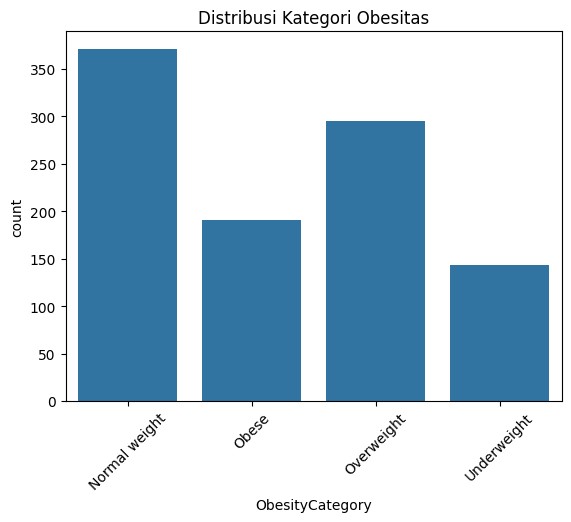

In [ ]:
sns.countplot(x='ObesityCategory', data=df)
plt.title('Distribusi Kategori Obesitas')
plt.xticks(rotation=45)
plt.show()

Dataset ini bisa imbalanced karena normal weight memiliki data lebih banyak dan jauh distribusinya jika dibandingkan dengan obese dan underweight

**Histogram untuk Data Numerik**

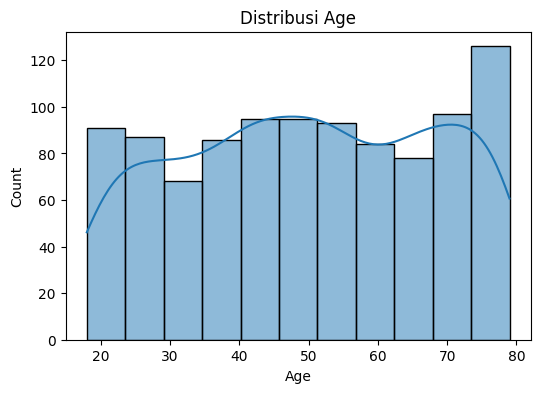

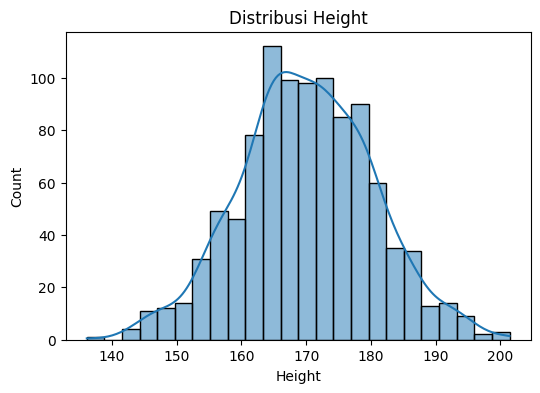

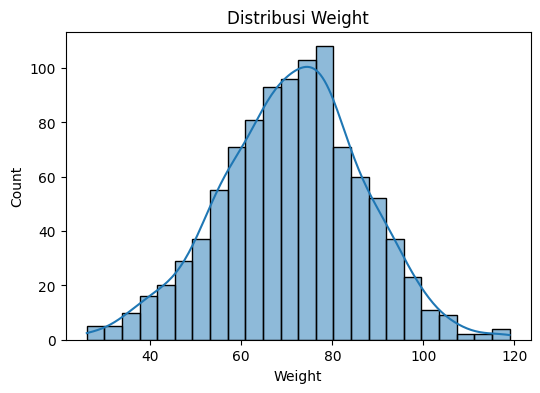

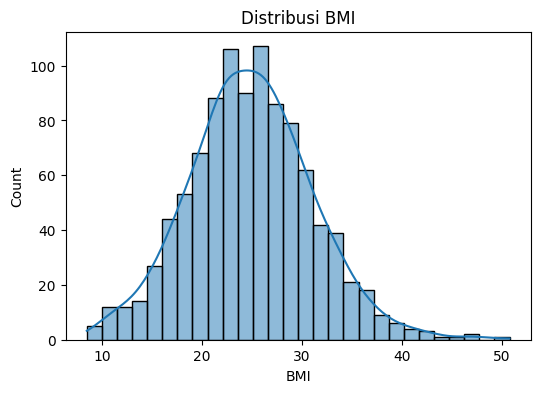

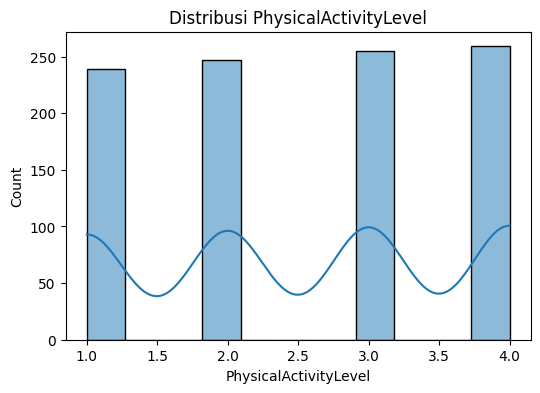

In [ ]:
numerical_cols = ['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

**Boxplot untuk Deteksi Outlier**

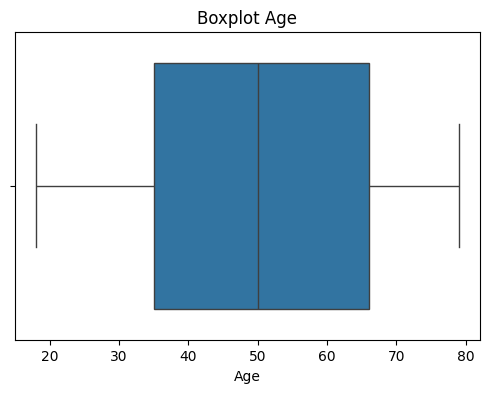

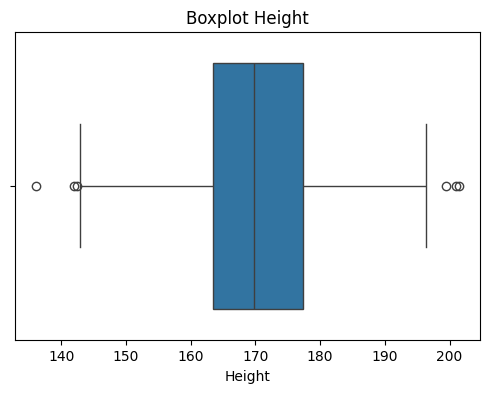

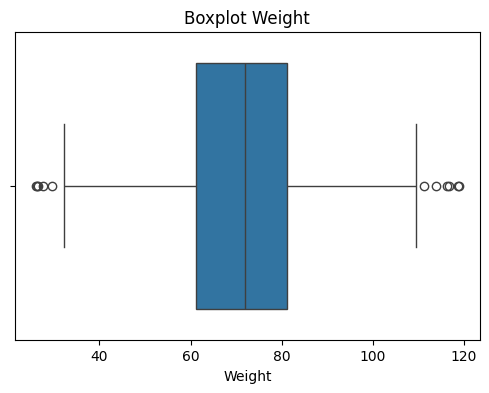

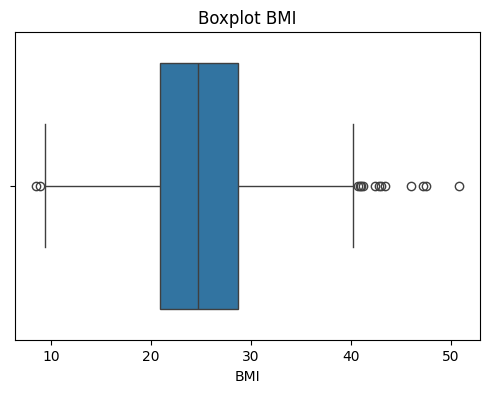

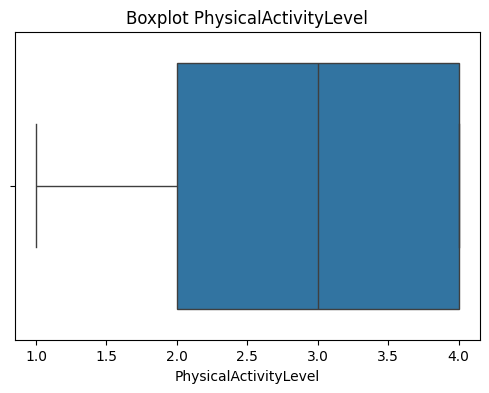

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.show()

**Distribusi Obesitas Berdasarkan Gender**

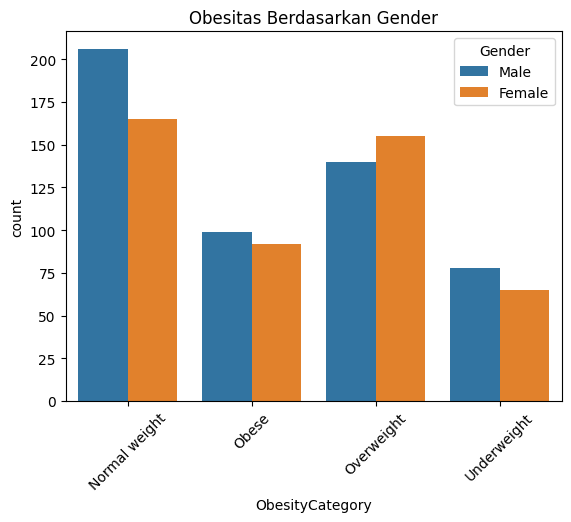

In [ ]:
sns.countplot(x='ObesityCategory', hue='Gender', data=df)
plt.title('Obesitas Berdasarkan Gender')
plt.xticks(rotation=45)
plt.show()

**Boxplot Distribusi BMI berdasarkan Obesitas**

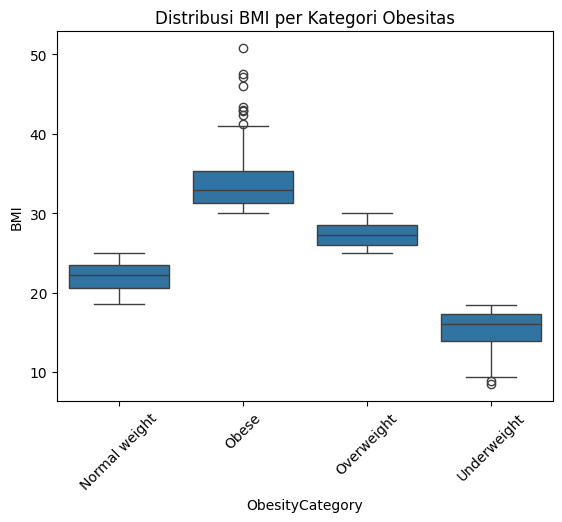

In [ ]:
sns.boxplot(x='ObesityCategory', y='BMI', data=df)
plt.title('Distribusi BMI per Kategori Obesitas')
plt.xticks(rotation=45)
plt.show()

Barchart kategori obesitas berdasarkan kelompok usia

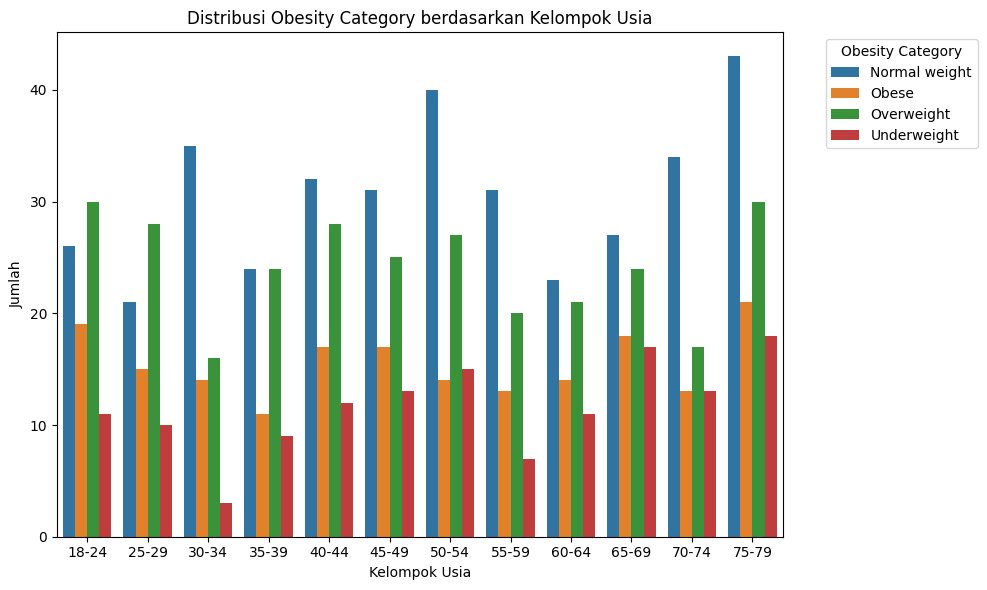

In [ ]:
bins = [18, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79]
labels = ['18-24', '25-29', '30-34', '35-39', '40-44',
          '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79']

df_temp = df.copy()
df_temp['AgeGroup'] = pd.cut(df_temp['Age'], bins=bins, labels=labels, right=True)

plt.figure(figsize=(10, 6))
sns.countplot(data=df_temp, x='AgeGroup', hue='ObesityCategory')
plt.title('Distribusi Obesity Category berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah')
plt.legend(title='Obesity Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Matriks Korelasi antar Data Numerik**

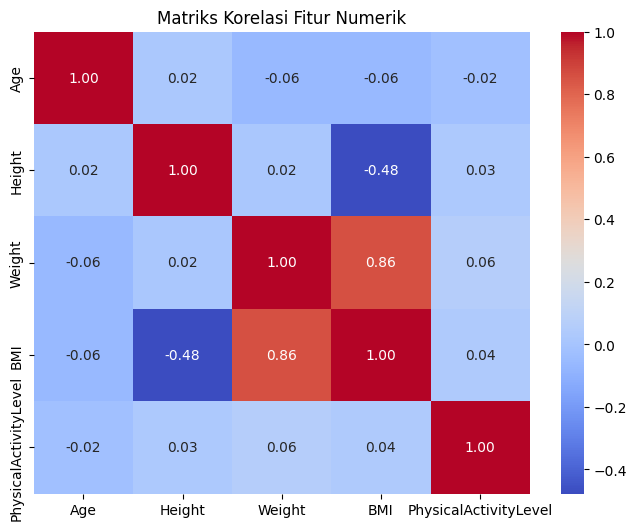

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

**Pairplot Data Numerik**

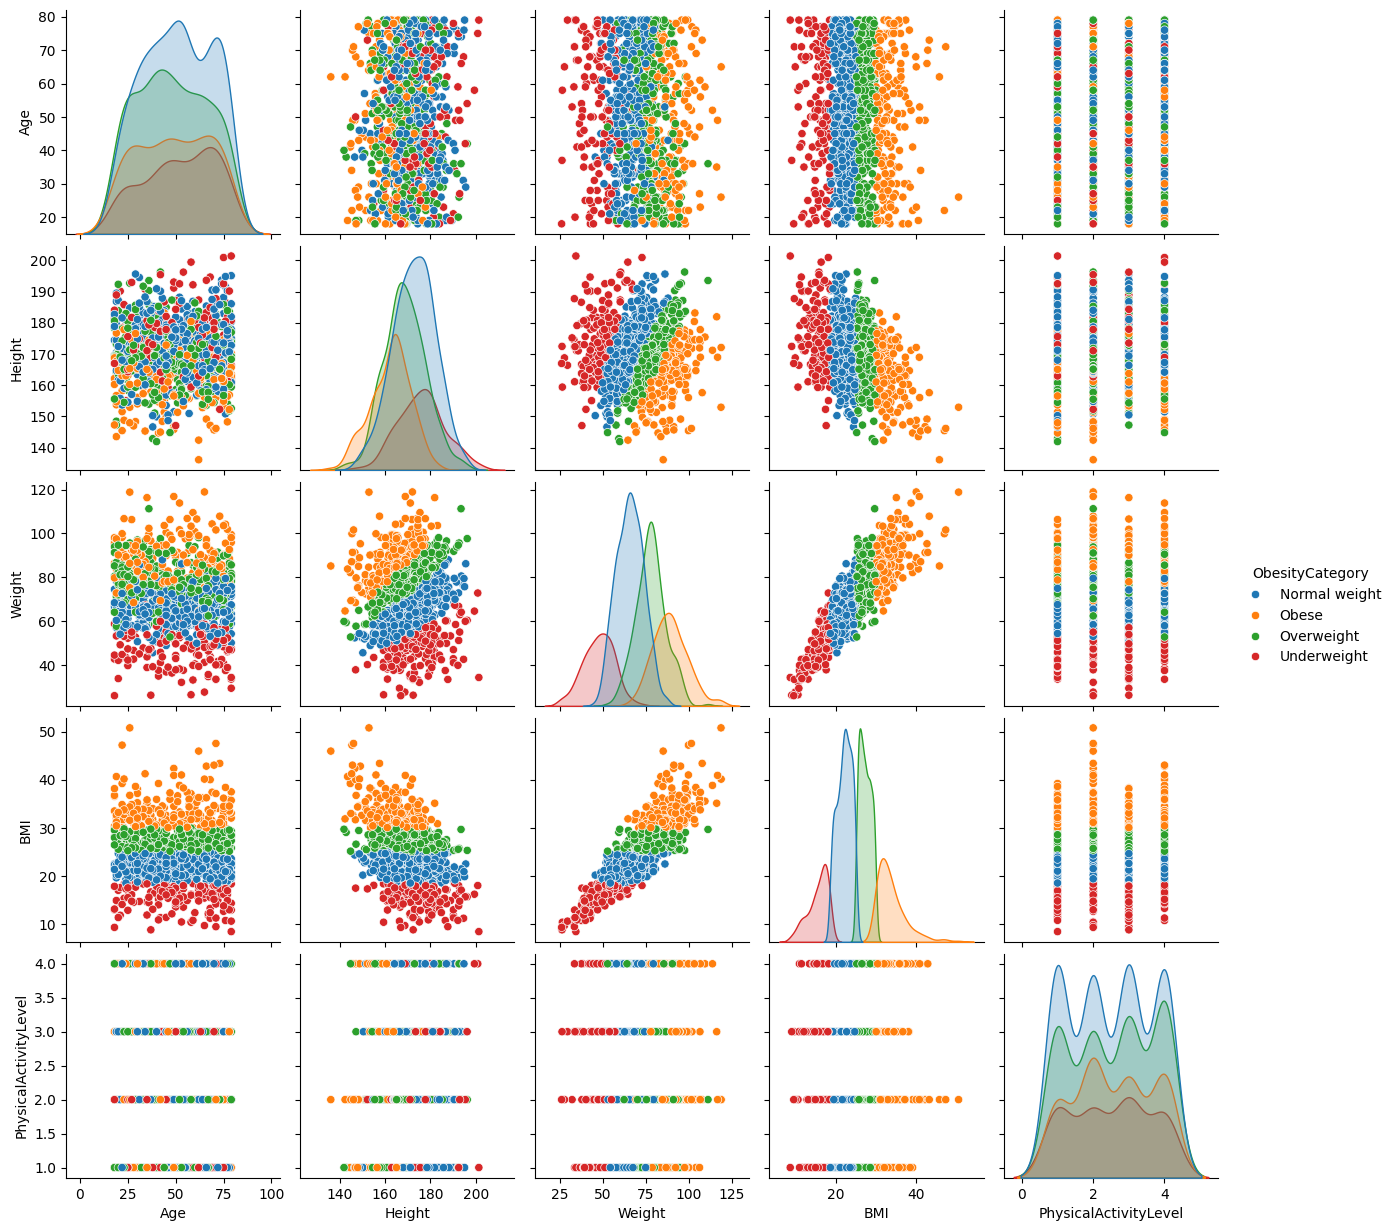

In [ ]:
sns.pairplot(df, hue='ObesityCategory', vars=numerical_cols)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
print(f"Jumlah Missing Value: \n", df.isnull().sum())
print(f"Jumlah Data Duplikat: ", df.duplicated().sum())
print("================================================")
df.drop_duplicates()
df.dropna()

print(f"Jumlah Missing Value Terbaru: \n", df.isnull().sum())
print(f"Jumlah Data Duplikat Terbaru: ", df.duplicated().sum())

Jumlah Missing Value: 
 Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64
Jumlah Data Duplikat:  0
Jumlah Missing Value Terbaru: 
 Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64
Jumlah Data Duplikat Terbaru:  0


In [ ]:
# One-hot encoding untuk Gender
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Label Encoding untuk Obesity Category
le = LabelEncoder()
df['ObesityCategory'] = le.fit_transform(df['ObesityCategory'])
df.head(5)

,Age,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory,Gender_Male
0,56,173.575262,71.982051,23.891783,4,0,True
1,69,164.127306,89.959256,33.395209,2,1,True
2,46,168.072202,72.930629,25.817737,4,2,False
3,32,168.459633,84.886912,29.912247,3,2,True
4,60,183.568568,69.038945,20.487903,3,0,True


In [ ]:
X = df.drop(["ObesityCategory"], axis=1)
y = df["ObesityCategory"]

# Splitting train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisasi fitur
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

print(f"Total keseluruhan data: {len(X)}")
print(f"Total data train: {len(X_train)}")
print(f"Total data test: {len(X_test)}")

Total keseluruhan data: 1000
Total data train: 800
Total data test: 200


In [ ]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Gabungkan dengan targetnya
train_df = pd.concat([X_train_df, y_train.reset_index(drop=True)], axis=1)
test_df = pd.concat([X_test_df, y_test.reset_index(drop=True)], axis=1)

# Simpan ke file CSV
train_df.to_csv('obesity_data_train_preprocessing.csv', index=False)
test_df.to_csv('obesity_data_test_preprocessing.csv', index=False)

In [ ]:
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']